In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [27]:
print(X.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object


In [26]:
print(X_train.shape)
print(y_train.shape)

(1279, 11)
(1279,)


In [20]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("winequality-red.csv")

# Crear la nueva variable categórica
def clasificar_calidad(valor):
    if valor <= 4:
        return 'baja'
    elif valor <= 6:
        return 'media'
    else:
        return 'alta'

df['calidad_cat'] = df['quality'].apply(clasificar_calidad)

In [6]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [7]:
print ("2. Preprocesamiento")

2. Preprocesamiento


In [21]:
X = df.drop(columns=['quality', 'calidad_cat'])
y = df['calidad_cat']

In [9]:
print ("3. seleccion de caracteristicas")

3. seleccion de caracteristicas


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [11]:
print (" 4. dividir en train y test")

 4. dividir en train y test


In [29]:
print(X_train.shape)
print(y_train.shape)

(1279, 11)
(1279,)


In [31]:
print ("5. entrenar el modelo")

5. entrenar el modelo


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Modelo mejorado
modelo_rf = RandomForestClassifier(
    n_estimators=200,        # más árboles para mejorar estabilidad
    max_depth=10,            # permite más complejidad
    min_samples_split=5,     # evita sobreajuste
    class_weight='balanced', # mejora en clases desbalanceadas
    random_state=42
)

# Entrenar el modelo
modelo_rf.fit(X_train, y_train)

# Predicciones
y_pred = modelo_rf.predict(X_test)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Definimos el modelo base
rf = RandomForestClassifier(random_state=42)

# Espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Búsqueda aleatoria
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=20, cv=3, verbose=2, n_jobs=-1, random_state=42)

# Entrenamos el modelo
random_search.fit(X_train, y_train)

# Seleccionamos el mejor modelo
best_model = random_search.best_estimator_
print("Mejores parámetros encontrados:", random_search.best_params_)

# Predicciones
y_pred = best_model.predict(X_test)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Mejores parámetros encontrados: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}


In [33]:
print ("6. evaluacion del desempeño")

6. evaluacion del desempeño


In [34]:
# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.859375

Classification Report:
               precision    recall  f1-score   support

        alta       0.63      0.67      0.65        43
        baja       0.00      0.00      0.00        13
       media       0.90      0.93      0.92       264

    accuracy                           0.86       320
   macro avg       0.51      0.54      0.52       320
weighted avg       0.83      0.86      0.84       320


Matriz de Confusión:
 [[ 29   0  14]
 [  0   0  13]
 [ 17   1 246]]


In [35]:
print ("7. graficas")

7. graficas


In [46]:
y_pred = best_model.predict(X_test);

In [43]:
labels = sorted(y_test.unique())  # O list(set(y_test))

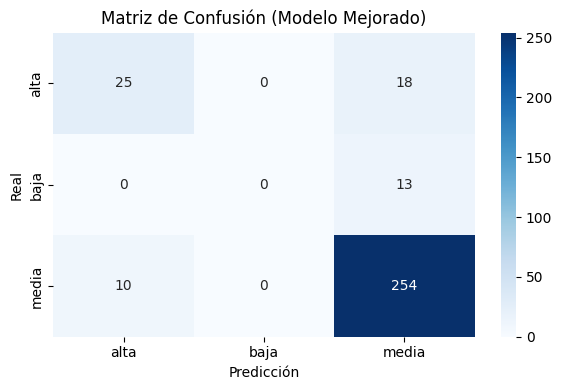

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Asegura etiquetas únicas
labels = sorted(y_test.unique())

# Matriz
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Visualización
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (Modelo Mejorado)')
plt.tight_layout()
plt.show()

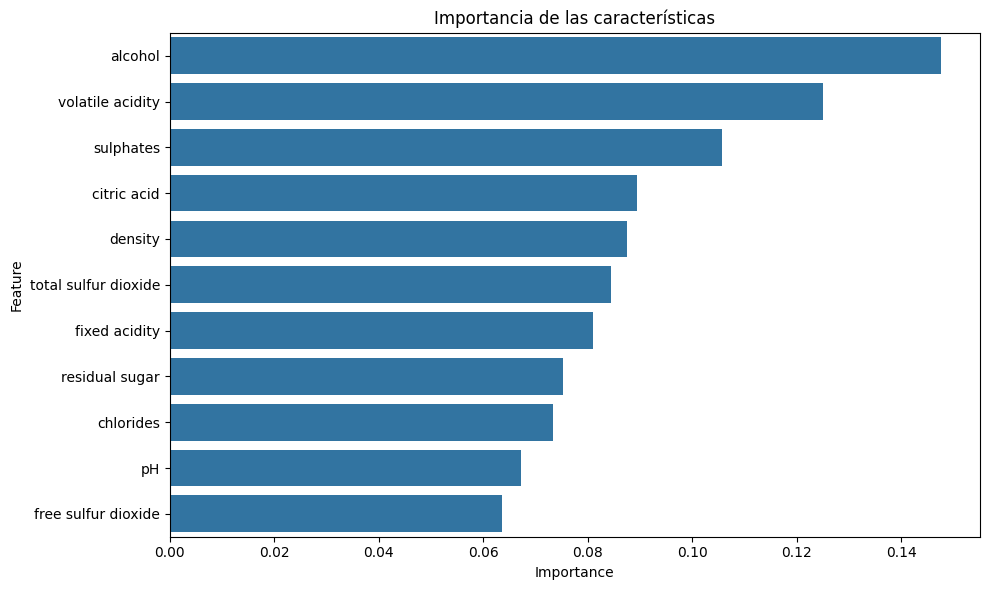

In [47]:
import pandas as pd

# Verifica que best_model tenga atributo feature_importances_
importances = best_model.feature_importances_
features = X.columns

# Creamos el dataframe
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Importancia de las características')
plt.tight_layout()
plt.show()

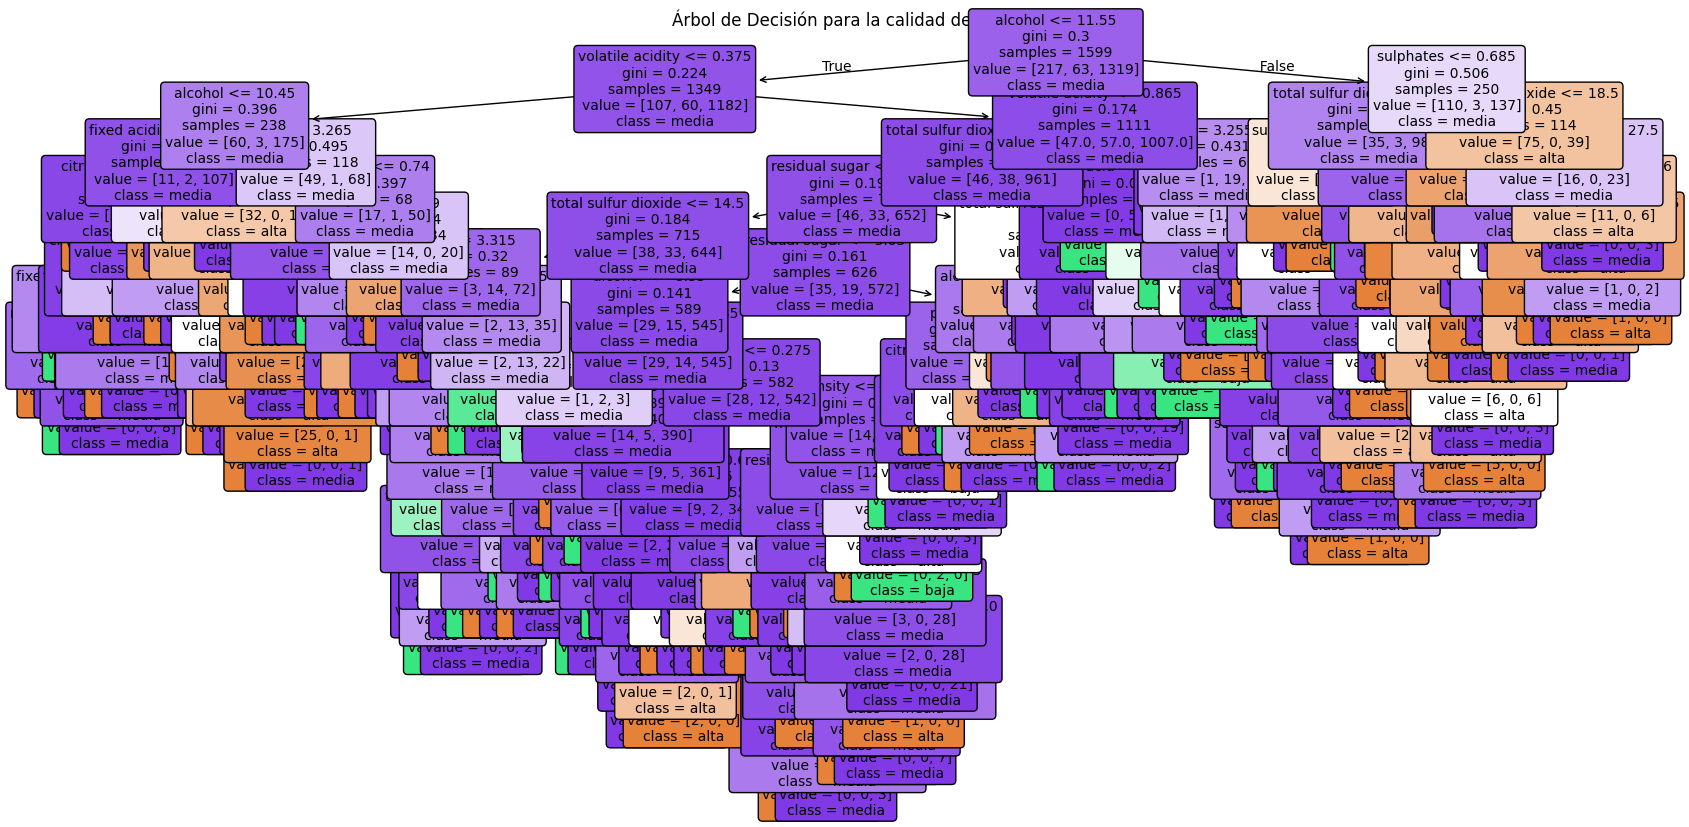

In [55]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Entrena el modelo si no lo habías hecho antes
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Grafica el árbol
plt.figure(figsize=(20, 10))
plot_tree(model,
          feature_names=X.columns,
          class_names=[str(c) for c in sorted(y.unique())],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Árbol de Decisión para la calidad del vino")
plt.show()

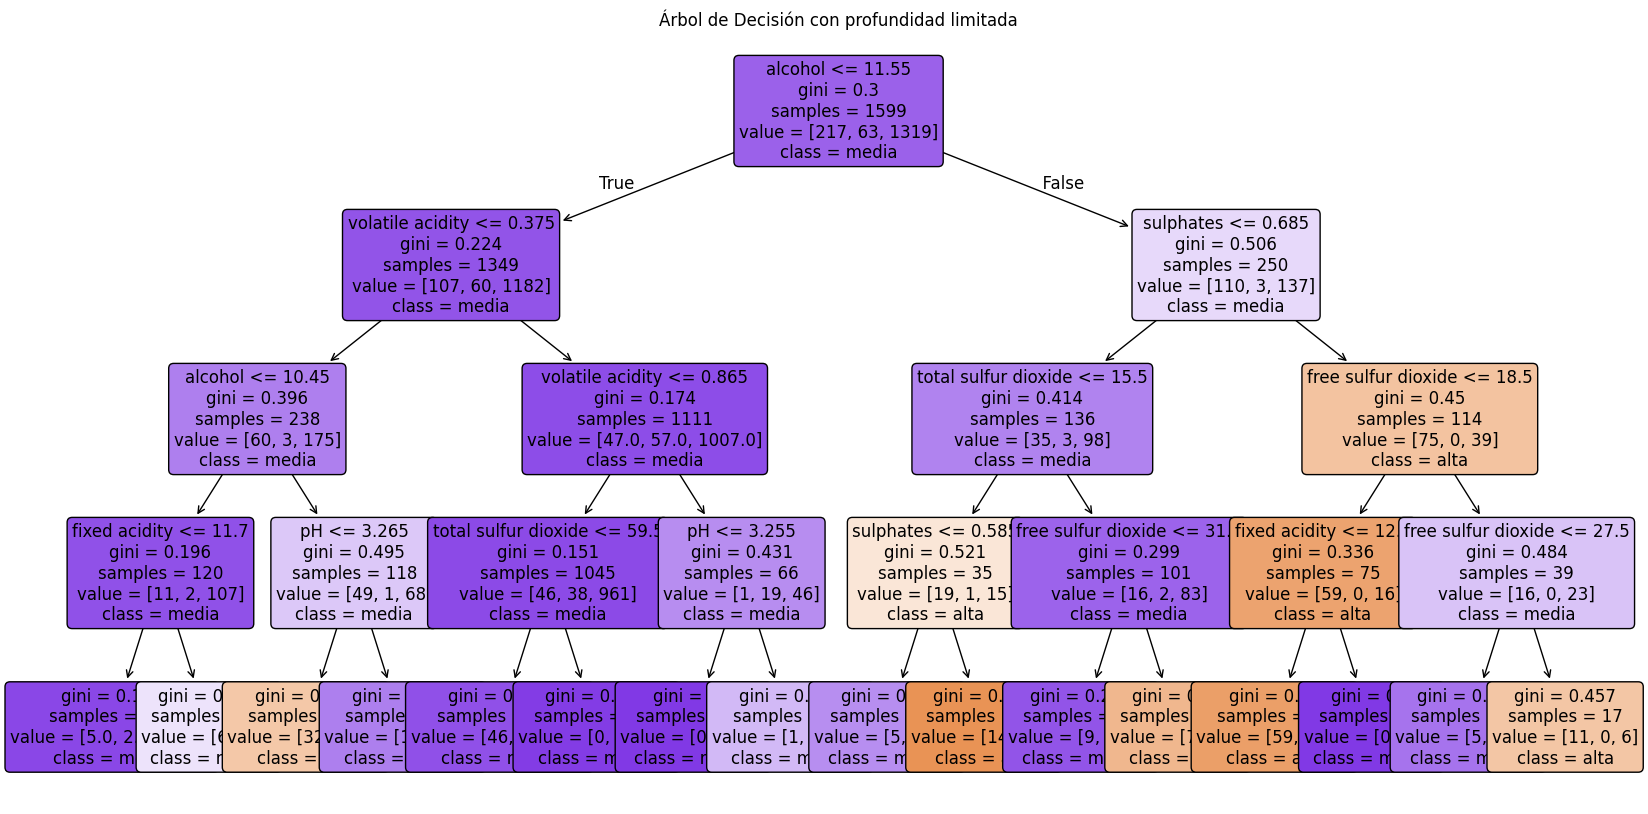

In [56]:
# Árbol de decisión con profundidad máxima limitada
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X, y)

plt.figure(figsize=(20, 10))
plot_tree(model,
          feature_names=X.columns,
          class_names=[str(c) for c in sorted(y.unique())],
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Árbol de Decisión con profundidad limitada")
plt.show()